In [41]:
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

##### Define  the fuzzy sets for input variables (service and food)

In [42]:
# np.arange(a, b, c) initial chart size [a, b] - x axis c - step (how smooth function will be) 
service_rate_range = np.arange(0, 10, 0.1)
food_rate_range = np.arange(0, 10, 0.1)

service = ctrl.Antecedent(service_rate_range, 'service')
food = ctrl.Antecedent(food_rate_range, 'food')

##### Define Gaussian MFs for 'service' input

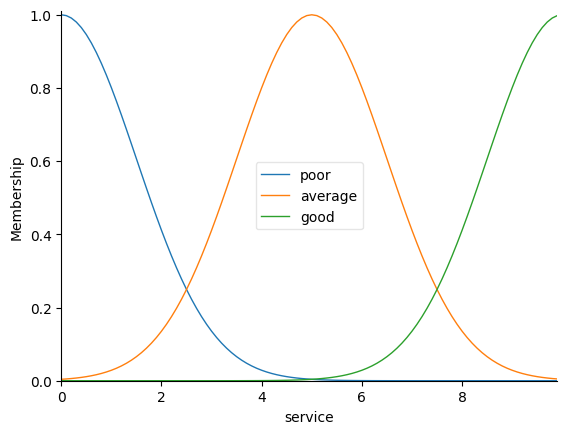

In [43]:
service['poor'] = fuzz.gaussmf(service.universe, 0, 1.5)
service['average'] = fuzz.gaussmf(service.universe, 5, 1.5)
service['good'] = fuzz.gaussmf(service.universe, 10, 1.5)
service.view()

##### Define Trapezoidal MF for 'food' input

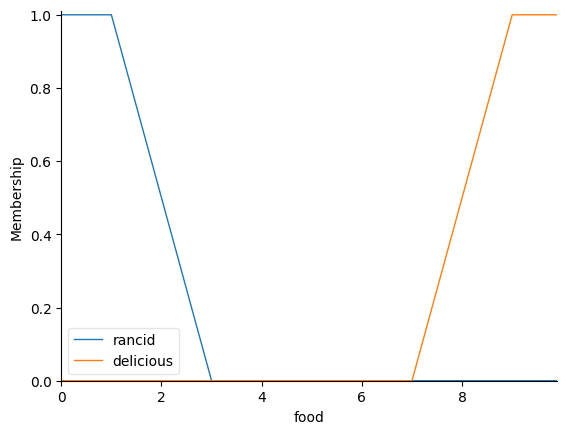

In [44]:
food['rancid'] = fuzz.trapmf(food.universe, [0, 0, 1, 3])
food['delicious'] = fuzz.trapmf(food.universe, [7, 9, 10, 10])
food.view()

##### Define the fuzzy set for output variable (tip)

In [45]:
tip = ctrl.Consequent(np.arange(0, 31, 1), 'tip')

##### Define Gaussian MFs for 'tip' output

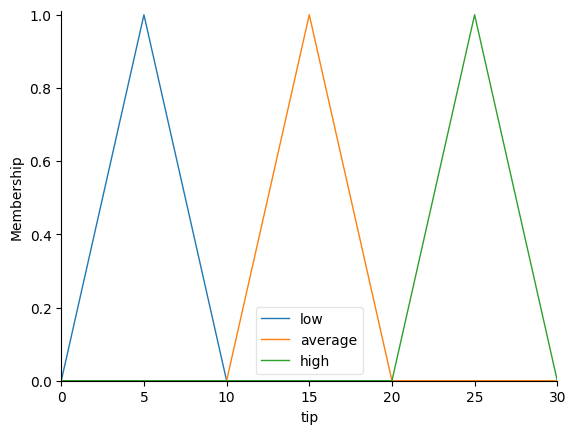

In [46]:
tip['low'] = fuzz.trimf(tip.universe, [0, 5, 10])
tip['average'] = fuzz.trimf(tip.universe, [10, 15, 20])
tip['high'] = fuzz.trimf(tip.universe, [20, 25, 30])
tip.view()

##### Define rules

In [47]:
rule1 = ctrl.Rule(service['poor'] | food['rancid'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['average'])
rule3 = ctrl.Rule(service['good'] | food['delicious'], tip['high'])

##### Testing FIS

In [48]:
service_tipping_val = 1
food_tipping_val = 9

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['service'] = service_tipping_val
tipping.input['food'] = food_tipping_val

tipping.compute()

agregated_out = tipping.output['tip']
print('Tip output:', agregated_out)

Tip output: 15.19689277449198


##### First rule intermediate cacls

In [49]:
# first rule

# Calculating Service MF intersection point 
service_intersection_idx1 = np.abs(service.universe - service_tipping_val).argmin()
service_intersection_val1 = service['poor'].mf[service_intersection_idx1]

# Calculating Food MF intersection point
food_interection_idx1 = np.abs(food.universe - food_tipping_val).argmin()
food_interception_val1 = food['rancid'].mf[food_interection_idx1]

# Calculating Tip MF intersection point applying rule [ Service OR(max) Food ]
tip_intersection_val1 = np.maximum(service_intersection_val1, food_interception_val1)

##### Second rule intermediate calcs

In [50]:
# second rule

# Calculating Service MF intersection point 
service_intersection_idx2 = np.abs(service.universe - service_tipping_val).argmin()
service_intersection_val2 = service['average'].mf[service_intersection_idx2]

# Calculating Tip MF intersection point applying rule [ Service AND(min) Food ]
tip_intersection_val2 = service_intersection_val2

##### Third rule intermediate calcs

In [51]:
# third rule

# Calculating Service MF intersection point 
service_intersection_idx3 = np.abs(service.universe - service_tipping_val).argmin()
service_intersection_val3 = service['good'].mf[service_intersection_idx3]

# Calculating Food MF intersection point
food_interection_idx3 = np.abs(food.universe - food_tipping_val).argmin()
food_interception_val3 = food['delicious'].mf[food_interection_idx3]

# Calculating Tip MF intersection point applying rule [ Service OR(max) Food ]
tip_intersection_val3 = np.maximum(service_intersection_val3, food_interception_val3)

##### Chart initialization

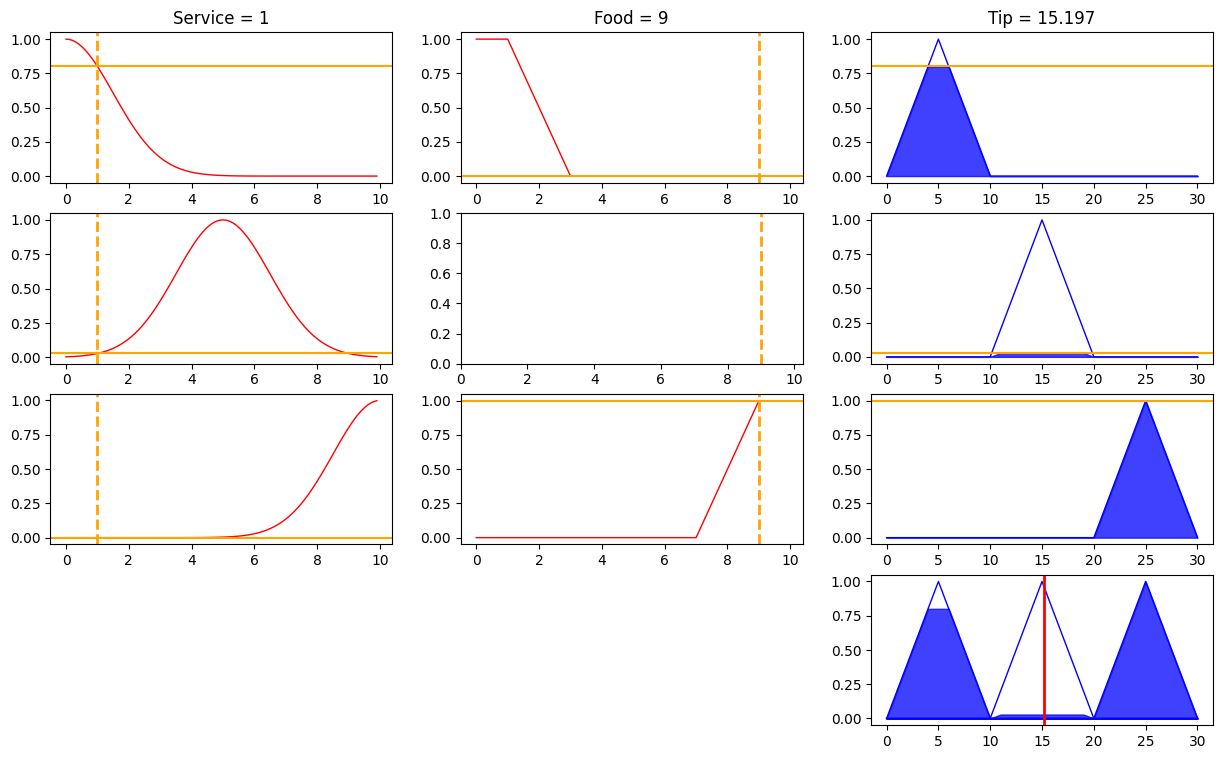

In [52]:
figure, axis = plt.subplots(4, 3, figsize=(15, 9))

axis[0, 0].set_title(f'Service = {service_tipping_val}')
axis[0, 1].set_title(f'Food = {food_tipping_val}')
axis[0, 2].set_title(f'Tip = {agregated_out:.3f}')

axis[3, 0].axis('off')
axis[3, 1].axis('off')



# ================= First rule MFs plotting=================
axis[0, 0].plot(service.universe, service['poor'].mf, 'r', linewidth=1)
axis[0, 0].axvline(x=service_tipping_val, ymin=0, ymax=1, color='orange', linestyle='--', linewidth=2)
axis[0, 0].axhline(y=service_intersection_val1, xmin=0, xmax=11, color='orange')

axis[0, 1].plot(food.universe, food['rancid'].mf, 'r', linewidth=1)
axis[0, 1].axvline(x=food_tipping_val, ymin=0, ymax=1, color='orange', linestyle='--', linewidth=2)
axis[0, 1].axhline(y=food_interception_val1, xmin=0, xmax=11, color='orange')

axis[0, 2].plot(tip.universe, tip['low'].mf, 'b', linewidth=1)
axis[0, 2].axhline(y=tip_intersection_val1, xmin=0, xmax=11, color='orange')
axis[0, 2].fill_between(tip.universe, 0, np.minimum(tip['low'].mf, tip_intersection_val1), color='blue', alpha=0.75)



# ================= Second rule MFs plotting =================
axis[1, 0].plot(service.universe, service['average'].mf, 'r', linewidth=1)
axis[1, 0].axvline(x=service_tipping_val, ymin=0, ymax=1, color='orange', linestyle='--', linewidth=2)
axis[1, 0].axhline(y=service_intersection_val2, xmin=0, xmax=11, color='orange')

axis[1, 1].set_xlim(0, 10.25)
axis[1, 1].axvline(x=food_tipping_val, ymin=0, ymax=1, color='orange', linestyle='--', linewidth=2)

axis[1, 2].plot(tip.universe, tip['average'].mf, 'b', linewidth=1)
axis[1, 2].axhline(y=tip_intersection_val2, xmin=0, xmax=11, color='orange')
axis[1, 2].fill_between(tip.universe, 0, np.minimum(tip['average'].mf, tip_intersection_val2), color='blue', alpha=0.75)



# ================= Third rule MFs plotting =================
axis[2, 0].plot(service.universe, service['good'].mf, 'r', linewidth=1)
axis[2, 0].axvline(x=service_tipping_val, ymin=0, ymax=1, color='orange', linestyle='--', linewidth=2)
axis[2, 0].axhline(y=service_intersection_val3, xmin=0, xmax=11, color='orange')

axis[2, 1].plot(food.universe, food['delicious'].mf, 'r', linewidth=1)
axis[2, 1].axvline(x=food_tipping_val, ymin=0, ymax=1, color='orange', linestyle='--', linewidth=2)
axis[2, 1].axhline(y=food_interception_val3, xmin=0, xmax=11, color='orange')

axis[2, 2].plot(tip.universe, tip['high'].mf, 'b', linewidth=1)
axis[2, 2].axhline(y=tip_intersection_val3, xmin=0, xmax=11, color='orange')
axis[2, 2].fill_between(tip.universe, 0, np.minimum(tip['high'].mf, tip_intersection_val3), color='blue', alpha=0.75)



# ================= Resulting MFs output plotting =================
axis[3, 2].plot(tip.universe, tip['low'].mf, 'b', linewidth=1)
axis[3, 2].fill_between(tip.universe, 0, np.minimum(tip['low'].mf, tip_intersection_val1), color='blue', alpha=0.75)

axis[3, 2].plot(tip.universe, tip['average'].mf, 'b', linewidth=1)
axis[3, 2].fill_between(tip.universe, 0, np.minimum(tip['average'].mf, tip_intersection_val2), color='blue', alpha=0.75)

axis[3, 2].plot(tip.universe, tip['high'].mf, 'b', linewidth=1)
axis[3, 2].fill_between(tip.universe, 0, np.minimum(tip['high'].mf, tip_intersection_val3), color='blue', alpha=0.75)

# ================= Computed tip =================
axis[3, 2].axvline(x=agregated_out, ymin=0, ymax=1, color='red', linewidth=2)

plt.show()

##### Control Surface plotting

In [53]:
X, Y = np.meshgrid(service_rate_range, food_rate_range)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        tipping.input['service'] = X[i, j]
        tipping.input['food'] = Y[i, j]
        tipping.compute()
        Z[i, j] = tipping.output['tip']

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])

fig.update_layout(
    scene=dict(
        xaxis_title='Service Quality',
        yaxis_title='Food Quality',
        zaxis_title='Tip Amount'
    ),
    title='Fuzzy Control Surface for Tip Calculation',
    autosize=False,
    width=700,
    height=900
)

fig.show()